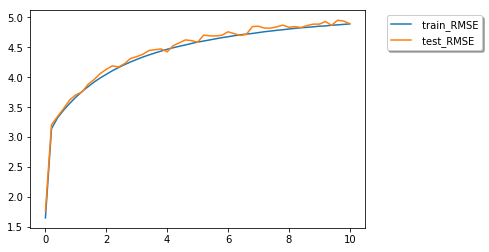

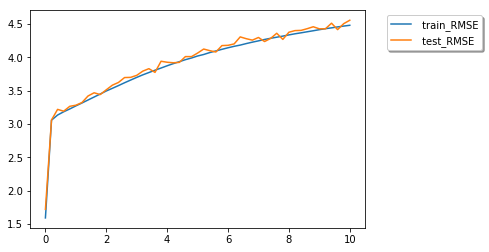

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from csv import reader
from sklearn.preprocessing import StandardScaler
from random import randrange
import operator
%matplotlib inline  

def linear_val_func(theta, x):
    # forwarding
    return np.dot(np.c_[np.ones(x.shape[0]), x], theta)

def linear_cost_func(theta, x, y):
    # compute cost (loss)
    y_hat = linear_val_func(theta, x)
    cost = np.mean((y_hat-y)**2)
    return cost

def load_dataset(filename):
    '''Loads an example of market basket transactions from a provided csv file.

    Returns: A list (database) of lists (transactions). Each element of a transaction is
    an item.
    '''
    with open(filename, 'r') as dest_f:
        data_iter = reader(dest_f, delimiter=',', quotechar='"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
    dataset = data_array.astype(float)
    return dataset

def transform_dataset(dataset, power):
    """
        Add higher powers of the input feature p ∈ {1, 2, 3, . . . } to input 
        For example, if the original dataset has 6 features, power = 2, it will add six new features to the input
        
        Arguments
        -------------
        dataset: the dataset(ndarray)
        power: the power that the input feature will be raised to(int)
        
        Returns
        ----------
        the new dataset(ndarray)
    """
    
    X = dataset[:, : -1]
    y = dataset[:, -1]
    y = y[:, None]
    for c in range(X.shape[1]):
        # get one feature
        feature = X[:, c]
        feature = feature[:, None]
        # raise the feature to the power of p
        for p in range(2, power + 1):
            new_feature = np.power(feature, p)
            X = np.hstack((X, new_feature))
    dataset = np.hstack((X, y))
    return dataset

    
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    
    # caculate each fold's size
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        # randomly chose index from dataset, put the corresponding num into fold until it reaches the fold's size
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
    
    
def normal_equation_r(X, y, alpha):
    #normal equation with regularization 
    return np.linalg.inv(X.T.dot(X) + alpha * np.identity(X.shape[1])).dot(X.T).dot(y)

def normal_equation_eval(dataset, n_folds, alpha):
    """
        Ridge regression using the analytical closed form solution. 
       
        Arguments
        ----------
        dataset: the dataset
        alpha: regularization parameter.
        
        Returns
        ----------
        average RMSE for both training set and testing set across the folds
        """
    dataset_split = cross_validation_split(dataset, n_folds)
    RMSE_train = []
    RMSE_test = []
    SSE_train = []
    SSE_test = []
    average_train_RMSE =[]
    average_test_RMSE = []
    
    for i in range(n_folds):
        test = np.array(dataset_split[i])
        # merge the 10 sublist into a large list
        train = list(dataset_split)
        # remove the test data
        train.pop(i)
        # combine the list into a large adarray 
        train = np.array(reduce(operator.add, train))
    
        X_train = train[:, :-1]
        X_test = test[:, :-1]
        
        X_train_centered = X_train - X_train.mean(axis = 0)
        X_test_centered = X_test - X_train.mean(axis = 0)
        
        Y_train = train[:, -1]
        Y_test = test[:,-1]
        
        Y_train = Y_train[:, None]
        Y_test = Y_test[:, None]

        # change the dimension from (num, ) to (num, 1)
        Y_train_centered = Y_train - Y_train.mean(axis = 0)


        fitted_theta = normal_equation_r(X_train_centered, Y_train_centered, alpha)

        # calculate w0 (the mean of Y train)
        w0 = Y_train.mean(axis=0)
        # concat w0 and trained theta
        fitted_theta = np.insert(fitted_theta, 0, w0)
        fitted_theta = fitted_theta[:, None]
          
        RMSE_test.append(np.sqrt(np.sum((linear_val_func(fitted_theta, X_test_centered) -  Y_test)**2) / Y_test.shape[0]))
        RMSE_train.append(np.sqrt(np.sum((linear_val_func(fitted_theta, X_train_centered) - Y_train)**2) / Y_train.shape[0]))
        
    #calculate average RMSE across folds
    train_RMSE = np.sum(RMSE_train)*1./len(RMSE_train)
    test_RMSE = np.sum(RMSE_test)*1. / len(RMSE_test)
#     print('When alpha = {}, Average Train RMSE across the folds: {}'.format(alpha, train_RMSE))
#     print('When alpha = {}, Average Test RMSE across the folds: {}'.format(alpha, test_RMSE))
#     print ""
    return train_RMSE, test_RMSE

def main():
    power = 5
    hp_alpha = np.linspace(0, 10, 51)
    average_train_RMSE =[]
    average_test_RMSE = []
    dataset = load_dataset("sinData_Train.csv")
    dataset = transform_dataset(dataset, power)
    for alpha in hp_alpha:
        train_RMSE, test_RMSE =normal_equation_eval(dataset, 10, alpha)
        average_train_RMSE.append(train_RMSE)
        average_test_RMSE.append(test_RMSE)
    plt.plot(np.arange(0, 10 + 0.2, 0.2), average_train_RMSE, label = " train_RMSE")
    plt.plot(np.arange(0, 10 + 0.2, 0.2), average_test_RMSE, label = " test_RMSE")
    plt.legend(bbox_to_anchor=(1.05,1),loc=2, shadow=True)
    plt.show()
    
    power = 10
    hp_alpha = np.linspace(0, 10, 51)
    average_train_RMSE =[]
    average_test_RMSE = []
    dataset = load_dataset("sinData_Train.csv")
    dataset = transform_dataset(dataset, power)
    for alpha in hp_alpha:
        train_RMSE, test_RMSE =normal_equation_eval(dataset, 10, alpha)
        average_train_RMSE.append(train_RMSE)
        average_test_RMSE.append(test_RMSE)
    plt.plot(np.arange(0, 10 + 0.2, 0.2), average_train_RMSE, label = " train_RMSE")
    plt.plot(np.arange(0, 10 + 0.2, 0.2), average_test_RMSE, label = " test_RMSE")
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
    plt.show()
    

if __name__ == "__main__":
    main()